=== Overall Leaderboard ===


,Model,Accuracy,Macro F1
3,qwen3-4b-thinking-2507,0.956522,0.951168
5,phi-4-reasoning-plus,0.973913,0.942936
4,meta-llama-3.1-8b-instruct,0.782609,0.817883
2,ToxicBERT,0.730435,0.753367
0,Classical_XGBoost,0.730435,0.705326
1,DistilBERT,0.713043,0.689310


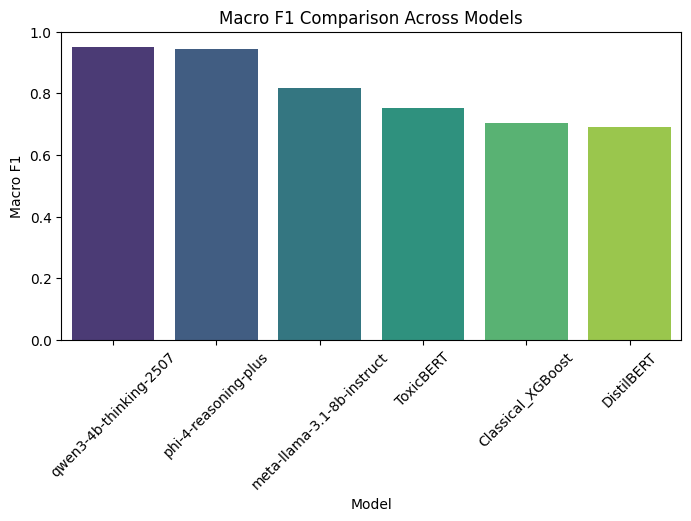

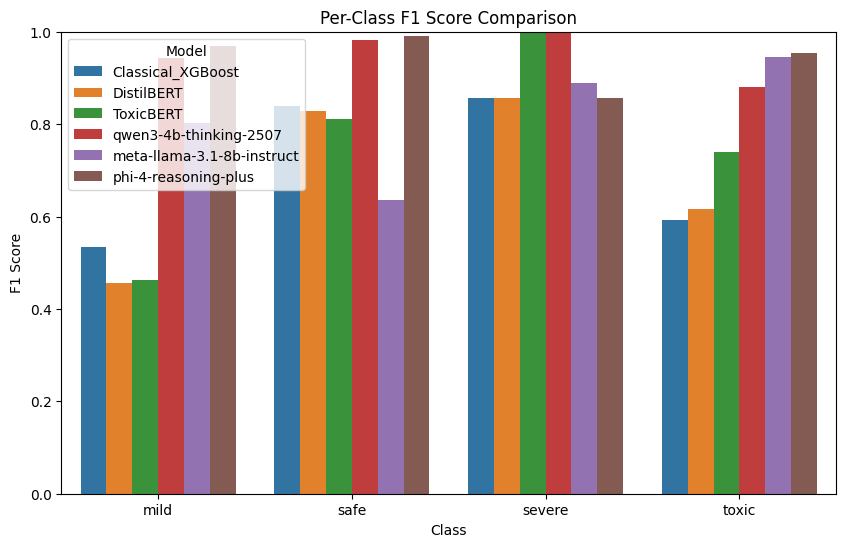

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =============================
# Paths to saved metric JSONs
# =============================
metrics_files = {
    "Classical_XGBoost": "../results/metrics/phase1_classical_metrics_forum_based_comments.json",
    "DistilBERT": "../results/metrics/phase2_distilBert_metrics_forum_based_comments.json",
    "ToxicBERT": "../results/metrics/phase3_toxicBert_metrics_forum_based_comments.json",
    "qwen3-4b-thinking-2507": "../results/comparisons/llm/qwen3-4b-thinking-2507/summary.json",
    "meta-llama-3.1-8b-instruct": "../results/comparisons/llm/meta-llama-3.1-8b-instruct/summary.json",
    "phi-4-reasoning-plus": "../results/comparisons/llm/phi-4-reasoning-plus/summary.json"
}

# =============================
# Load metrics into DataFrames
# =============================
overall_rows = []
per_class_rows = []

for model_name, path in metrics_files.items():
    with open(path, "r") as f:
        data = json.load(f)
    
    overall_rows.append({
        "Model": model_name,
        "Accuracy": data.get("accuracy"),
        "Macro F1": data.get("macro_f1")
    })
    
    for cls, f1 in data.get("per_class_f1", {}).items():
        per_class_rows.append({
            "Model": model_name,
            "Class": cls,
            "F1": f1
        })

df_overall = pd.DataFrame(overall_rows)
df_per_class = pd.DataFrame(per_class_rows)

# =============================
# Display Overall Leaderboard
# =============================
df_overall_sorted = df_overall.sort_values("Macro F1", ascending=False)
print("=== Overall Leaderboard ===")
display(df_overall_sorted)

plt.figure(figsize=(8,4))
sns.barplot(data=df_overall_sorted, x="Model", y="Macro F1", hue="Model", dodge=False, palette="viridis")
plt.title("Macro F1 Comparison Across Models")
plt.ylim(0,1)
plt.ylabel("Macro F1")
plt.xticks(rotation=45)
plt.show()

# =============================
# Display Per-Class F1 Comparison
# =============================
plt.figure(figsize=(10,6))
sns.barplot(data=df_per_class, x="Class", y="F1", hue="Model", palette="tab10")
plt.title("Per-Class F1 Score Comparison")
plt.ylim(0,1)
plt.ylabel("F1 Score")
plt.xlabel("Class")
plt.legend(title="Model")
plt.show()